In [1]:
import os
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen, Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import datetime
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\buitu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
web_url = 'https://finviz.com/quote.ashx?t='

news_tables = {}

tickers = ['AMZN', 'AAPL', 'GOOG', 'META', 'NFLX', 'MSFT', 'TSLA']

for tick in tickers:
    url = web_url + tick
    try:
        req = Request(url=url,headers={"User-Agent": "Chrome"}) 
    except HTTPError as e:
        if e.code == 404:
            pass
    response = urlopen(req)    
    html = BeautifulSoup(response,"html.parser")
    news_table = html.find(id='news-table')
    news_tables[tick] = news_table

news_list = []

for file_name, news_table in news_tables.items():
    for i in news_table.findAll('tr'):
        
        if i.a:
            text = i.a.get_text()
        else:
            pass
        date_scrape = i.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        tick = file_name.split('_')[0]
        
        news_list.append([tick, date, time, text])
    

In [3]:
vader = SentimentIntensityAnalyzer()

columns = ['ticker', 'date', 'time', 'headline']

news_df = pd.DataFrame(news_list, columns=columns)

scores = news_df['headline'].apply(vader.polarity_scores)

scores_df = pd.DataFrame(scores)

news_df = news_df.join(scores_df, rsuffix='_right')

import numpy as np

compounds = []
for hr in news_df['headline_right']:
    compounds.append(hr.get('compound', np.nan))

news_df['compound'] = compounds

today = datetime.datetime.now().strftime('%b-%d-%y') 

news_df.loc[news_df['date'] == 'Today', 'date'] = today
news_df

,ticker,date,time,headline,headline_right,compound
0,AMZN,Jan-28-24,03:19PM,Jeff Bezos still using homemade door desk from...,"{'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'comp...",-0.0258
1,AMZN,Jan-28-24,02:33PM,20 Most in Demand Jobs in Europe,"{'neg': 0.229, 'neu': 0.771, 'pos': 0.0, 'comp...",-0.1970
2,AMZN,Jan-28-24,01:52PM,A Little Good News for Rivian Investors,"{'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'comp...",0.3832
3,AMZN,Jan-28-24,01:13PM,"A Fed meeting, big tech earnings and the Janua...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,AMZN,Jan-28-24,12:17PM,Here's Why Netflix's Deal With TKO Is a Game-C...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
...,...,...,...,...,...,...
716,TSLA,Jan-25-24,12:27PM,Tesla's time in the sun is over as EV imports ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
717,TSLA,Jan-25-24,12:09PM,Court takes new look at whether Musk post ille...,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...",-0.6486
718,TSLA,Jan-25-24,12:03PM,US STOCKS-Wall St climbs after strong GDP data...,"{'neg': 0.128, 'neu': 0.671, 'pos': 0.201, 'co...",0.2960
719,TSLA,Jan-25-24,11:57AM,Can Tesla stock be headed for correction on gr...,"{'neg': 0.221, 'neu': 0.588, 'pos': 0.191, 'co...",-0.1027


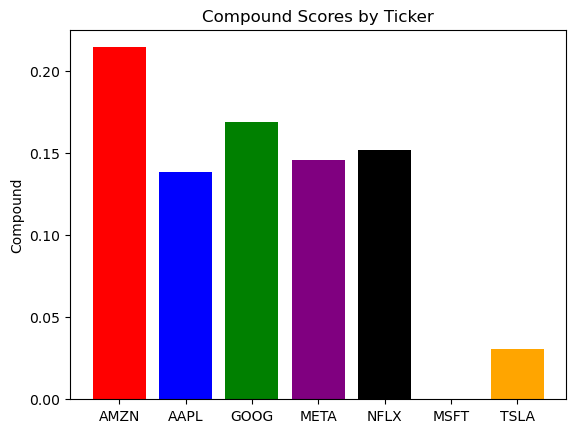

In [4]:
import matplotlib.pyplot as plt

new = news_df[['ticker','compound']]

mean_scores = new.groupby(['ticker']).mean().reset_index()

# Extract columns as lists  
tickers = mean_scores['ticker'].tolist()
compounds = mean_scores['compound'].tolist()

fig, ax = plt.subplots()

ax.bar('AMZN', [row[1] for row in mean_scores.values if row[0] == 'AMZN'], color='red')
ax.bar('AAPL', [row[1] for row in mean_scores.values if row[0] == 'AAPL'], color='blue')
ax.bar('GOOG', [row[1] for row in mean_scores.values if row[0] == 'GOOG'], color='green')
ax.bar('META', [row[1] for row in mean_scores.values if row[0] == 'META'],color='purple')
ax.bar('NFLX', [row[1] for row in mean_scores.values if row[0] == 'NFLX'], color='black')
ax.bar('MSFT', [row[1] for row in mean_scores.values if row[0] == 'MSFT'], color='white')
ax.bar('TSLA', [row[1] for row in mean_scores.values if row[0] == 'TSLA'], color='orange')



ax.set_ylabel('Compound')
ax.set_title('Compound Scores by Ticker')
plt.show()

ax.set_ylabel('Compound')
ax.set_title('Compound Scores by Ticker')
plt.show()